In [15]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [16]:
from collections import Counter

## 디올

In [17]:
mag_d = pd.read_csv('./magazine/final/magazine_d_stickword.csv', sep ='|', encoding = 'utf-8')

In [18]:
mag_d

,magazine,brand,title,link,date,word_dior,ADFN,ADFN_2
0,A,D,빈티지 쇼핑의 시대,http://www.allurekorea.com/2020/10/27/%eb%b9%8...,2020-10-27,"['그러니 빈티지 패션은, 어쩌면 나도 좋고 너도 좋은 일이다. 당시 사랑했던, 지...","['빈티지', '패션', '좋', '느', '좋', '당시', '사랑', '사랑',...","['빈티지', '패션', '좋', '느', '좋', '당시', '사랑', '사랑',..."
1,A,D,"주식을 시작한 패션 에디터의 이야기, 나는 주주다",http://www.allurekorea.com/2020/10/16/%ec%a3%b...,2020-10-16,[' 요즘 들어 주식은 친구들과의 대화에서 빼놓을 수 없는 주제가 되었다. 코로나...,"['요즘', '주식', '친구', '과의', '대화', '빼놓', '주제', '코로...","['요즘', '주식', '친구', '과의', '대화', '빼놓', '주제', '코로..."
2,A,D,거리로 나온 하이패션 슈즈들 4,http://www.allurekorea.com/2020/09/16/%eb%a6%a...,2020-09-16,"[""['나이키의 조던 시리즈들 중에서도 역대급으로 평가받는 ‘에어 디올’은 부르는 ...","['나이', '조', '덜', '시리즈', '역대', '급', '평가', '에어',...","['나이', '조', '덜', '시리즈', '역대', '급', '평가', '에어',..."
3,A,D,차정원부터 아이린까지. 옷 잘입는 셀럽들의 사복 패션에 등장한 뉴 백은 무엇?,http://www.allurekorea.com/2020/08/13/%ec%b0%a...,2020-08-13,['디올 레이디 디올 디올아무르 미니백 5백만원대'],"['DIOR', 'LADY', 'DIOR', 'DIOR', '아무르', '미니']","['DIOR', 'LADY', 'DIOR', 'DIOR', '아무르', '미니']"
4,A,D,DON’T CATEGORIZE ME / 유태오,http://www.allurekorea.com/2020/05/28/dont-cat...,2020-05-28,['실크 슬리브리스와 블랙 와이드 팬츠는 김서룡 옴므. 블랙 부츠는 보테가 베네타....,"['실크', '슬리브리스', '블랙', '와이드', '팬츠', '김', '룡', '...","['실크', '슬리브리스', '블랙', '와이드', '팬츠', '김', '룡', '..."
...,...,...,...,...,...,...,...,...
1754,W,D,가을의 하이킹,http://www.wkorea.com/2016/09/05/%ea%b0%80%ec%...,2016-09-05,['6. 주얼 장식과 앙증맞은 리본이 반전의 매력을 더하는 부츠는 디올 제품. 1백...,"['얼', '장식', '앙증맞', '리본', '반전', '매력', '부츠', 'DI...","['얼', '장식', '앙증맞', '리본', '반전', '매력', '부츠', 'DI..."
1755,W,D,W해시태그,http://www.wkorea.com/2016/09/02/w%ed%95%b4%ec...,2016-09-02,"['#W뷰티콕 (뷰티 디렉터 송시은)\\n조회 2,023회\\n너무나 뜨거운 여름...","['W', '뷰티', '콕', '뷰티', '디렉터', '송', '시은', '조회',...","['W', '뷰티', '콕', '뷰티', '디렉터', '송', '시은', '조회',..."
1756,W,D,마법의 색,http://www.wkorea.com/2016/09/02/%eb%a7%88%eb%...,2016-09-02,"[""'크리스찬 디올에게 초록은 곧 ‘자연’을, 빨강은 ‘생명’을, 분홍은 ‘감미로움...","['CHRISTIAN', 'DIOR', '초록', '자연', '빨강', '생명', ...","['CHRISTIAN', 'DIOR', '초록', '자연', '빨강', '생명', ..."
1757,W,D,따로 또 같이,http://www.wkorea.com/2016/09/02/%eb%94%b0%eb%...,2016-09-02,"['자수 장식 슈트, 실크 셔츠에 리본 타이를 연출한 구찌, 남성다운 검정 테일러드...","['자수', '장식', '슈트', '실크', '셔츠', '리본', '타이', '남성...","['자수', '장식', '슈트', '실크', '셔츠', '리본', '타이', '남성..."


In [19]:
mag_d['word'] = mag_d['word_dior']

In [20]:
mag_D = mag_d[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

In [21]:
len(mag_D)

1759

### 5

In [18]:
idx5 = []
for i in range(len(mag_D)):
    if i % 5 == 0 :
        idx5.append(i)

In [19]:
mag_D5 = mag_D.loc[idx5]

In [21]:
len(mag_D5)

352

In [20]:
mag_D5.reset_index(drop = True, inplace = True)

### 9

In [22]:
idx9 = []
for i in range(len(mag_D)):
    if i % 9 == 0 :
        idx9.append(i)

In [23]:
mag_D9 = mag_D.loc[idx9]

In [24]:
len(mag_D9)

196

In [25]:
mag_D9.reset_index(drop = True, inplace = True)

## 지수

### 지수 (유튜브 + 매거진)

In [10]:
tot_ji = pd.read_csv('./magazine/final/video_jisu_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [11]:
tot_ji['word'] = tot_ji['word_jisu']

In [12]:
tot_JI = tot_ji[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

In [13]:
len(tot_JI)

158

### 디올 + 지수

In [26]:
D9JI = pd.concat([mag_D9, tot_JI])

In [27]:
D9JI.reset_index(drop = True, inplace = True)

In [28]:
D9JI.to_csv('./magazine/final/D9JI.csv', sep = '|', encoding = 'utf-8', index = False)

In [29]:
len(D9JI)

354

In [96]:
# D4JE = pd.concat([mag_D4, tot_JE])

In [97]:
# D4JE.reset_index(drop = True, inplace = True)

In [98]:
# D4JE.to_csv('./magazine/final/D4JE.csv', sep = '|', encoding = 'utf-8', index = False)

In [99]:
# len(D4JE)

791

## stopword 추가

In [76]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [77]:
sw_df.columns = ['stopword']

In [78]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [79]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [80]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [81]:
add_0 = ['진짜', '존나', '보고', '그냥', '카이', '이광수', '광수', '런닝맨', '❤️', '없는', '유재석', '❤', '♥', '있고', '거', 
         '내', '더', '개', '사람', '영상', '광고', '언니', '말', '뭐', '수', '생각',
        '있는', '정말', '같은', '같음', '듯', '♡', '완전', '같아', '정도', '지금', '역시', '뭔가', '입니다', '때문', '아니라',
         '함', '같은데', '해', '하는', '할', '넘', '한', '안', '했다', '보면', '데', '하고', '하면', '게', '해서', '봐도', 
         '한다', '된', '건', '요', '움', '임', '애', '하는거', '해도', '보는', '이제', '했는데', '하는데', '하는게', '같아요', 
         '합니다', '하지', '하게', '되는', 'I', '는', '난', '서', '도', '줄', '위', '분', '알', '은', '두', '번', '뒤',
         '이건', '없다', '있어요', '아니고', '있어',
        '계속', '원래', '뭘', '못', '후', '이름', '속', '욕', '옆', '하네', '아님', '그런', '된다', '있음',
        '같', '돼', 'you', '제품', '표현', 'n', '봤는데', '건가', '나오는', '가지', '저런', '보이', '고',
        '중', '사진', '댓글', '부분', '진심', '그녀', '보', '날', '겁나', '요즘', '앞', '워', '이유', '솔직히', '하며', '통해',
        '모든', '항상', '전', '기자', '다시', '오늘', '↑', '이자', '대해', '걸', '처음', '머리', '헤어', '고민', '뿐']
for w in add_0:
    stop_words.append(w)

In [82]:
add_1 = ['BLACKPINK', '제니', '리사', '로제']
for w in add_1:
    stop_words.append(w)

In [83]:
add_2 = []
for w in add_1:
    stop_words.append(w)

In [84]:
len(stop_words)

835

In [85]:
D9JI['ADFN_2'] = D9JI['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace('"', '').str.replace("'", "").str.split(', ')

AttributeError: Can only use .str accessor with string values!

In [86]:
noun_adj_list = []
for i in range(len(D9JI)):
    for word in D9JI.loc[i, 'ADFN_2']:
        if word not in stop_words:
            noun_adj_list.append(word)

In [87]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('지수', 4231), ('예쁘다', 1889), ('DIOR', 776), ('귀엽다', 740), ('얼굴', 524), ('사랑', 471), ('노래', 393), ('매력', 263), ('음악', 243), ('패션', 242), ('목소리', 238), ('스타일', 187), ('춤', 171), ('배우', 169), ('아이돌', 162), ('실력', 148), ('컬렉션', 143), ('드레스', 141), ('라이브', 133), ('성격', 130), ('쇼', 129), ('브랜드', 126), ('음색', 124), ('최고', 122), ('여성', 119), ('누나', 119), ('영화', 116), ('여자', 115), ('연기', 110), ('블랙', 107), ('모델', 106), ('메이크업', 106), ('여신', 105), ('외모', 103), ('세계', 102), ('무대', 96), ('비주얼', 95), ('하우스', 93), ('재킷', 92), ('팬츠', 92), ('백', 92), ('패턴', 91), ('디자이너', 91), ('분위기', 89), ('라인', 83), ('완성', 83), ('장식', 83), ('봄', 82), ('웃음', 80), ('아름다운', 80), ('작품', 78), ('핑크', 78), ('드라마', 78), ('마음', 77), ('룩', 76), ('티', 73), ('노력', 72), ('느낌', 71), ('', 71), ('자연', 70), ('솔로', 68), ('컬러', 67), ('이미지', 66), ('셔츠', 66), ('레전드', 66), ('팬', 65), ('걸그룹', 64), ('눈', 63), ('MARIA', 63), ('화이트', 62), ('친구', 61), ('사랑스럽다', 61), ('가족', 59), ('시작', 59), ('매치', 59), ('시즌', 58), ('레드', 58), ('스타', 58), ('데님'

In [88]:
count = Counter(noun_adj_list)

In [89]:
word_list = count.most_common(500)
for v in word_list:
    print(v)

('지수', 4231)
('예쁘다', 1889)
('DIOR', 776)
('귀엽다', 740)
('얼굴', 524)
('사랑', 471)
('노래', 393)
('매력', 263)
('음악', 243)
('패션', 242)
('목소리', 238)
('스타일', 187)
('춤', 171)
('배우', 169)
('아이돌', 162)
('실력', 148)
('컬렉션', 143)
('드레스', 141)
('라이브', 133)
('성격', 130)
('쇼', 129)
('브랜드', 126)
('음색', 124)
('최고', 122)
('여성', 119)
('누나', 119)
('영화', 116)
('여자', 115)
('연기', 110)
('블랙', 107)
('모델', 106)
('메이크업', 106)
('여신', 105)
('외모', 103)
('세계', 102)
('무대', 96)
('비주얼', 95)
('하우스', 93)
('재킷', 92)
('팬츠', 92)
('백', 92)
('패턴', 91)
('디자이너', 91)
('분위기', 89)
('라인', 83)
('완성', 83)
('장식', 83)
('봄', 82)
('웃음', 80)
('아름다운', 80)
('작품', 78)
('핑크', 78)
('드라마', 78)
('마음', 77)
('룩', 76)
('티', 73)
('노력', 72)
('느낌', 71)
('', 71)
('자연', 70)
('솔로', 68)
('컬러', 67)
('이미지', 66)
('셔츠', 66)
('레전드', 66)
('팬', 65)
('걸그룹', 64)
('눈', 63)
('MARIA', 63)
('화이트', 62)
('친구', 61)
('사랑스럽다', 61)
('가족', 59)
('시작', 59)
('매치', 59)
('시즌', 58)
('레드', 58)
('스타', 58)
('데님', 57)
('영감', 57)
('인기', 57)
('DESIGN', 56)
('가수', 56)
('입덕', 56)
('뷰티', 55)
('존

In [90]:
top500 = pd.DataFrame(word_list)

In [91]:
top500.columns = ['word', 'count']

In [92]:
top500.to_csv('./D9JI_top500.csv', sep='|', encoding = 'utf-8', index = False)

## 워드클라우드 만들기

In [93]:
import matplotlib.pyplot as plt

In [94]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [95]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### 워드클라우드 그리기

In [96]:
from wordcloud import WordCloud

In [97]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

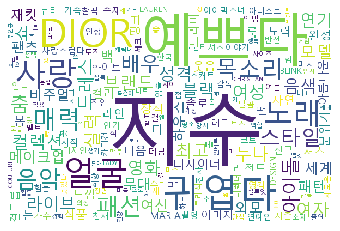

In [98]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('wc_D9JI_top500.png')

In [99]:
D9JI.to_csv('./magazine/final/D9JI_adfn_2.csv', sep='|', encoding = 'utf-8', index = False)